# Telco Customer Churn Project

## Part 1 - DEFINE

### ---- 1 Define the problem ----

"Predict behavior to retain customers. Analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Part 2 - DISCOVER

### ---- 2 Load the Data ----

In [2]:
#load the data into Pandas dataframe
df_raw = pd.read_csv('G:\Datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#check the head of the raw dataframe
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### ---- 3 Clean the Data ----

In [4]:
#check data frame info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#check for missing values
df_raw.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Since only 3 columns in the data frame have numeric values and the rest of data is object type, isnull() method cannot recognize missing data in those columns. Missing data there can be as an empty string. So check for the columns with empty string(object).

In [6]:
#Search for the rows having an empty string and replace them with NaN

for column in df_raw:
    print(column)
    df_raw[column].replace(' ',np.nan, inplace=True)
    print(df_raw[column].isna().value_counts())
    print('\n')

customerID
False    7043
Name: customerID, dtype: int64


gender
False    7043
Name: gender, dtype: int64


SeniorCitizen
False    7043
Name: SeniorCitizen, dtype: int64


Partner
False    7043
Name: Partner, dtype: int64


Dependents
False    7043
Name: Dependents, dtype: int64


tenure
False    7043
Name: tenure, dtype: int64


PhoneService
False    7043
Name: PhoneService, dtype: int64


MultipleLines
False    7043
Name: MultipleLines, dtype: int64


InternetService
False    7043
Name: InternetService, dtype: int64


OnlineSecurity
False    7043
Name: OnlineSecurity, dtype: int64


OnlineBackup
False    7043
Name: OnlineBackup, dtype: int64


DeviceProtection
False    7043
Name: DeviceProtection, dtype: int64


TechSupport
False    7043
Name: TechSupport, dtype: int64


StreamingTV
False    7043
Name: StreamingTV, dtype: int64


StreamingMovies
False    7043
Name: StreamingMovies, dtype: int64


Contract
False    7043
Name: Contract, dtype: int64


PaperlessBilling
False    7043
Nam

There is only one column TotalCharges which had empty strings and now replaced with Nan values.

In [7]:
#convert data type of TotalCharges to a proper format
df_raw['TotalCharges'] = df_raw['TotalCharges'].astype('float')

In [8]:
#check for rows witn NaN values
df_raw[df_raw['TotalCharges'].isna()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


As it's seen there is no total charges for the customers with '0' month of tenure. That means that they are very new  customers and have been using provided services for less than 1 month. So it's too early for them to decide whether to stay with the provider or not and it is clearly seen that the values in column Churn for all of them is 'No'.

In [9]:
# Replace NaN values with 0
df_raw['TotalCharges'].replace(np.nan, 0, inplace=True)

In [10]:
#check for rows witn 0 values
df_raw[df_raw['TotalCharges']== 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [11]:
#check for duplicate data
df_raw.duplicated().value_counts()

False    7043
dtype: int64

There is no duplicated data in the data frame.

In [12]:
#rename and use cleaned data frame for further analysis
df_clean = df_raw

### ---- 4 Explore the Data (EDA) ----

In [13]:
#retreive some statistics of numeric features in the data frame
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
# retreive some statistics  of categorical features in the data frame 
df_clean.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


Right away it's seen the amount of customers that stayed with the company - 5174 customers. At the same time the number of customers that left is 7043 - 5174 = 1869 customers.

In [15]:
#calculate the churn rate
churn_rate = df_clean.Churn.value_counts()/7043
churn_rate

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

26.5% of the churned customers is quite a big number. So to find out the reason of customer churn and develop focused customer retention programs is a crucial part of company's strategy.

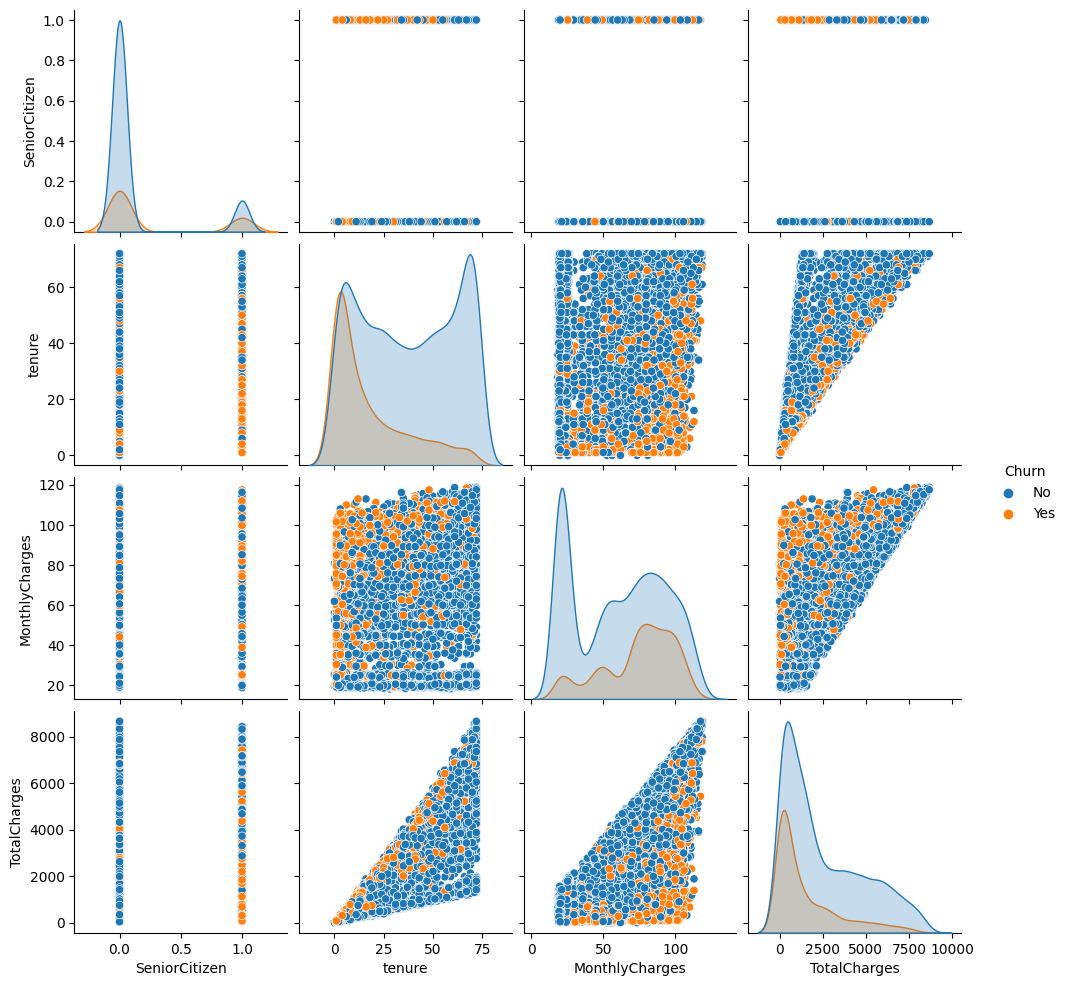

In [16]:
#building plots showing distribution of numeric variables for churned and non-churned customres
sns.pairplot(df_clean, hue='Churn')
plt.savefig("Numvar_distribution_plots.png",dpi=300,bbox_inches='tight')

It is a noticeable tendency for the customers with higher monthly charges are more likely to leave comparing to the ones with lower monthly charges.The individual plot is shown below.

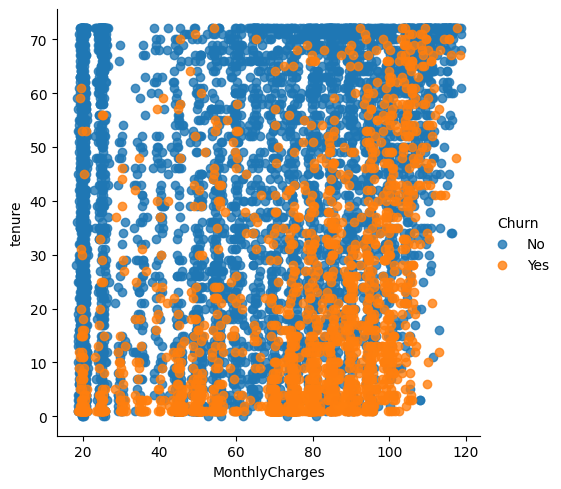

In [17]:
#Churned vs No churned depending on monthly charges and tenure
sns.lmplot(x='MonthlyCharges',y='tenure',data=df_clean,fit_reg=False,hue='Churn')
plt.savefig("MonthlyCharges_tenure_churn.png",dpi=300,bbox_inches='tight')

Let's take a closer look at each category and analyze them separately with regards to churn and non-churned customers.

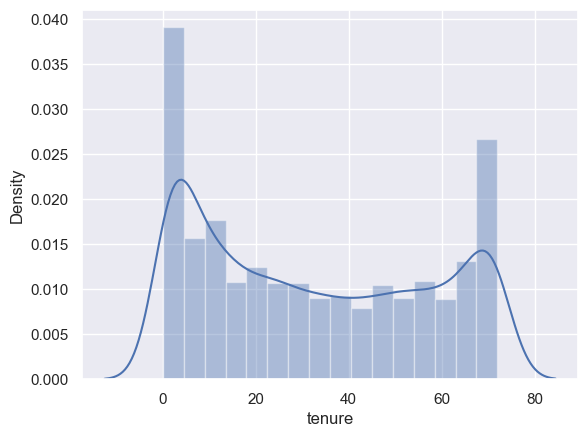

In [18]:
# Tenure distribution
sns.set(style="darkgrid")
sns.distplot(df_clean['tenure'])
plt.savefig("tenure_distrib.png",dpi=300,bbox_inches='tight')

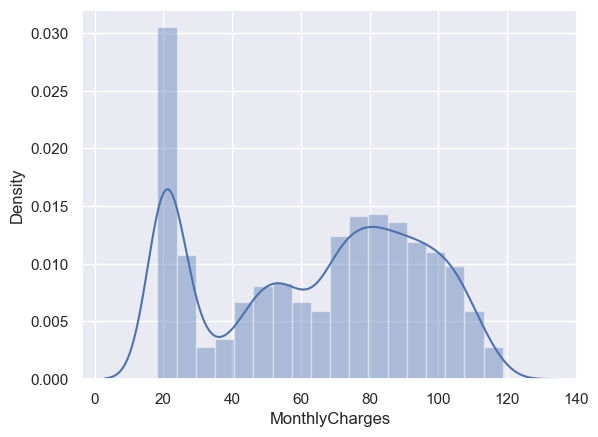

In [19]:
# Monthly charges distribution
sns.distplot(df_clean['MonthlyCharges'])
plt.savefig("MonthlyCharges_distrib.png",dpi=300,bbox_inches='tight')

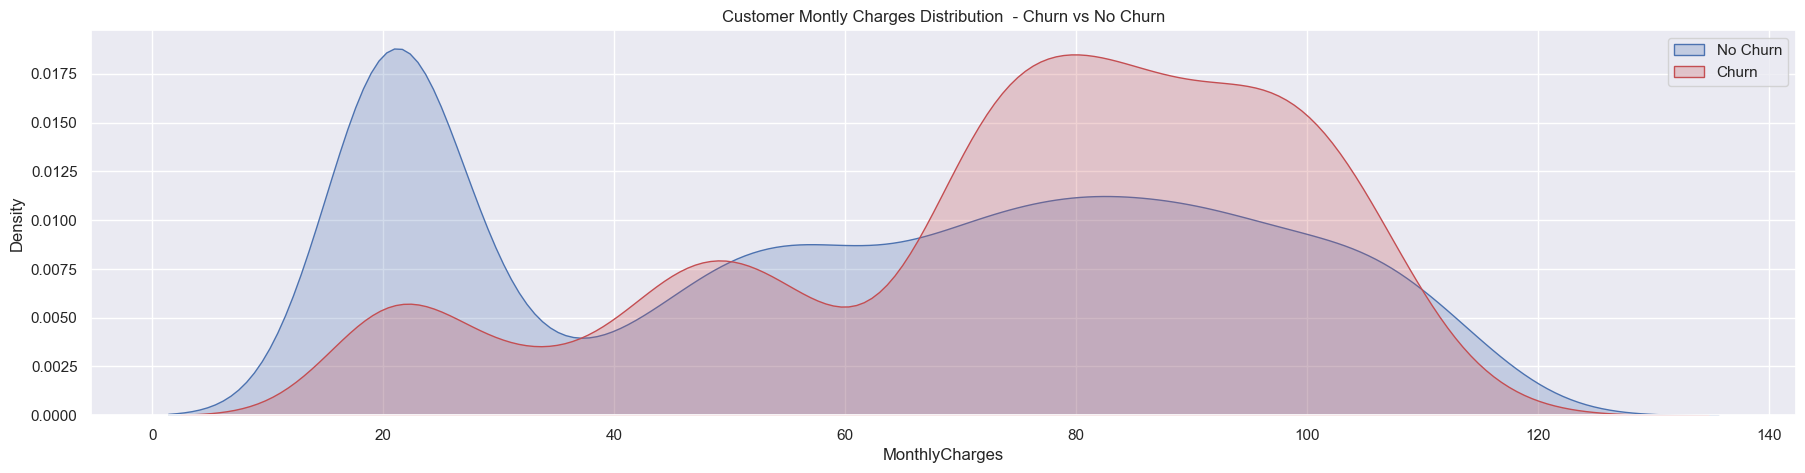

In [20]:
#Customer Montly Charges Distribution  - Churn vs No Churn
fig =plt.figure(figsize=(22,5))
ax=sns.kdeplot(df_clean.loc[(df_clean['Churn']=='No'),'MonthlyCharges'],color='b',shade=True, label='No Churn')
ax=sns.kdeplot(df_clean.loc[(df_clean['Churn']=='Yes'),'MonthlyCharges'],color='r',shade=True, label='Churn')
plt.title('Customer Montly Charges Distribution  - Churn vs No Churn')
plt.savefig("MonthlyCharges_distrib_churn.png",dpi=300,bbox_inches='tight')
plt.legend(loc='upper right')

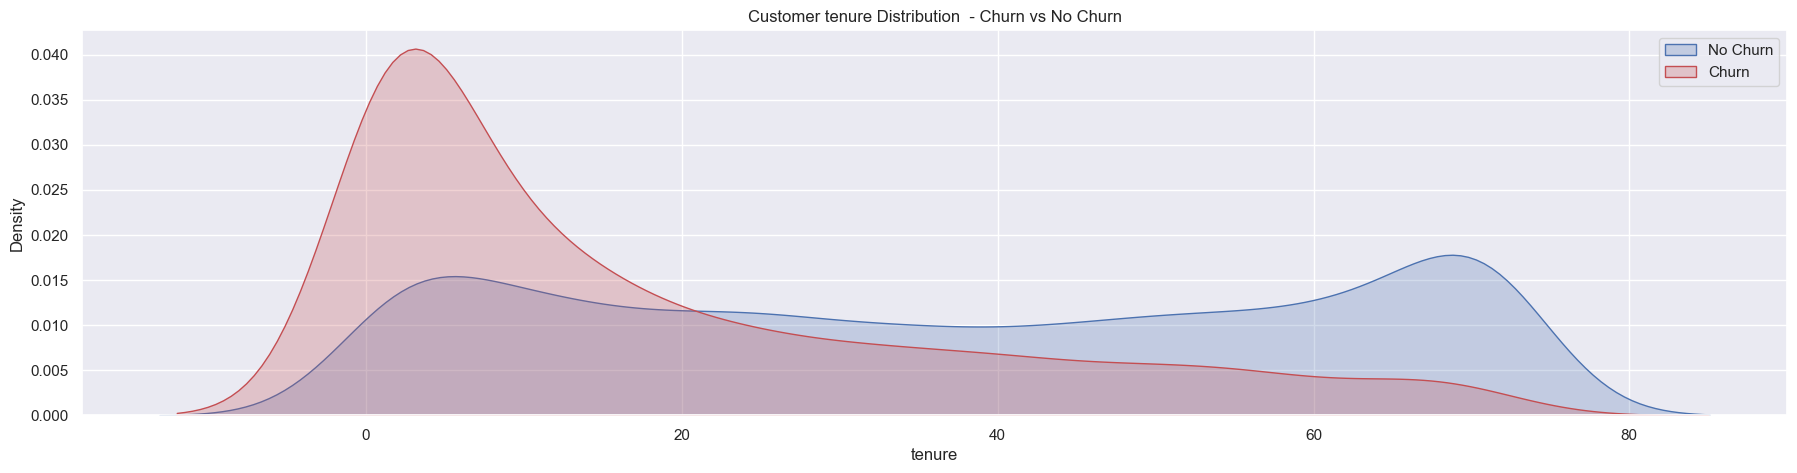

In [21]:
#Customer tenure Distribution  - Churn vs No Churn
fig =plt.figure(figsize=(22,5))
ax=sns.kdeplot(df_clean.loc[(df_clean['Churn']=='No'),'tenure'],color='b',shade=True, label='No Churn')
ax=sns.kdeplot(df_clean.loc[(df_clean['Churn']=='Yes'),'tenure'],color='r',shade=True, label='Churn')
plt.title('Customer tenure Distribution  - Churn vs No Churn')
plt.savefig("tenure_distrib_churn.png",dpi=300,bbox_inches='tight')
plt.legend(loc='upper right')

In [22]:
#building a bar plot showing churn vs no churn customers depending on category
def bar_plot(category):
    f,ax = plt.subplots(figsize=(9,6))
    ax = sns.countplot(x=category,hue='Churn',data=df_clean)
    total= len(df_clean['Churn'])
    for p in ax.patches:
        height =  p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height+25,'{:.1f}%'.format(100*height/total),ha='center')

#### Demographic 

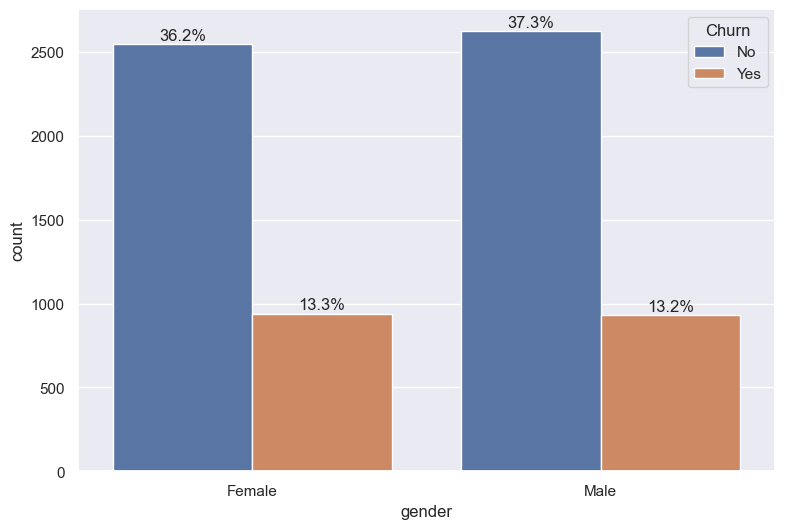

In [23]:
#Churned vs non-churned depending on gender
bar_plot('gender')
plt.savefig("Gender_churn.png",dpi=300,bbox_inches='tight')

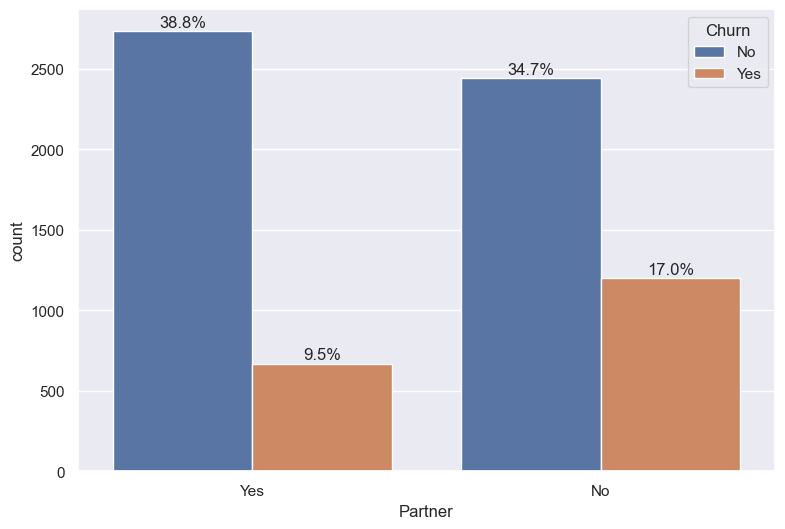

In [24]:
#Churned vs non-churned depending on having or not having a partner
bar_plot('Partner')
plt.savefig("Partner_churn.png",dpi=300,bbox_inches='tight')

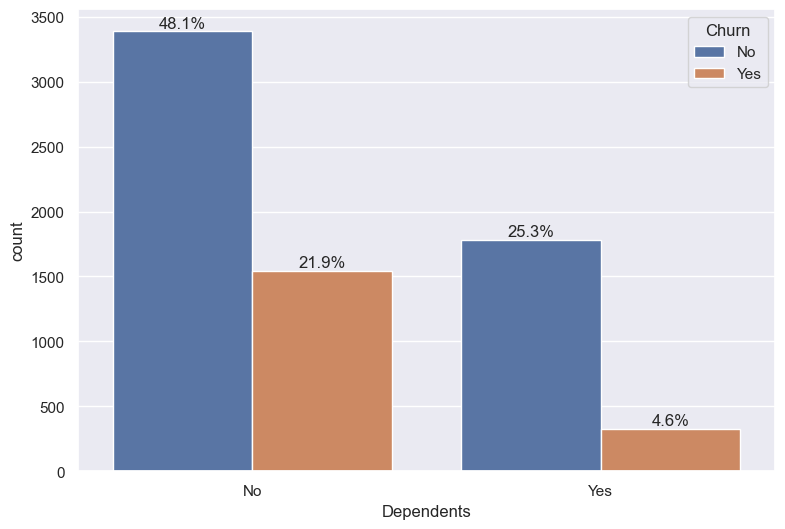

In [25]:
#Churned vs non-churned depending on having or not having dependents
bar_plot('Dependents')
plt.savefig("Dependents_churn.png",dpi=300,bbox_inches='tight')

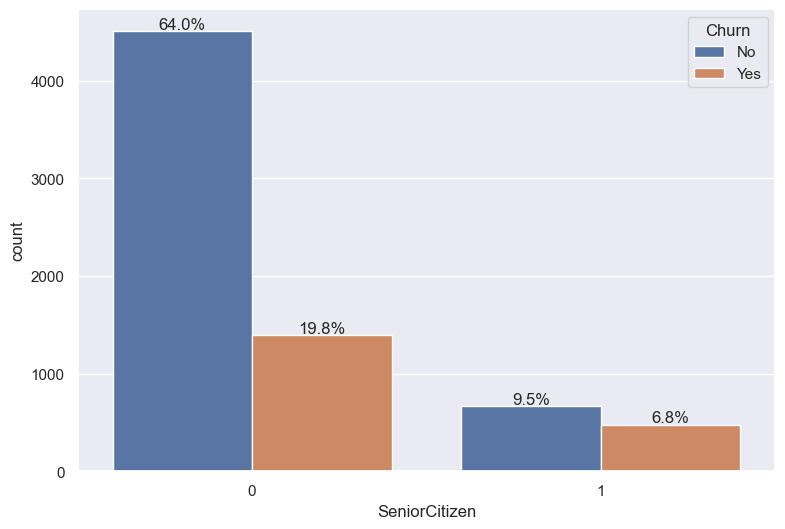

In [26]:
# Churned vs non-churned depending on fact if a customer is a Senior citizen
bar_plot('SeniorCitizen')
plt.savefig("SeniorCitizen_churn.png",dpi=300,bbox_inches='tight')

#### Services

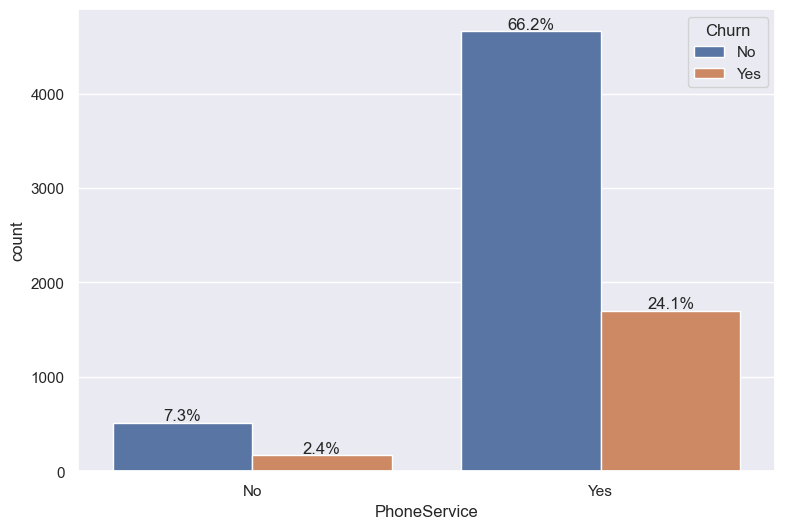

In [27]:
#Churned vs non-churned depending on having or not having phone service
bar_plot('PhoneService')
plt.savefig("PhoneService_churn.png",dpi=300,bbox_inches='tight')

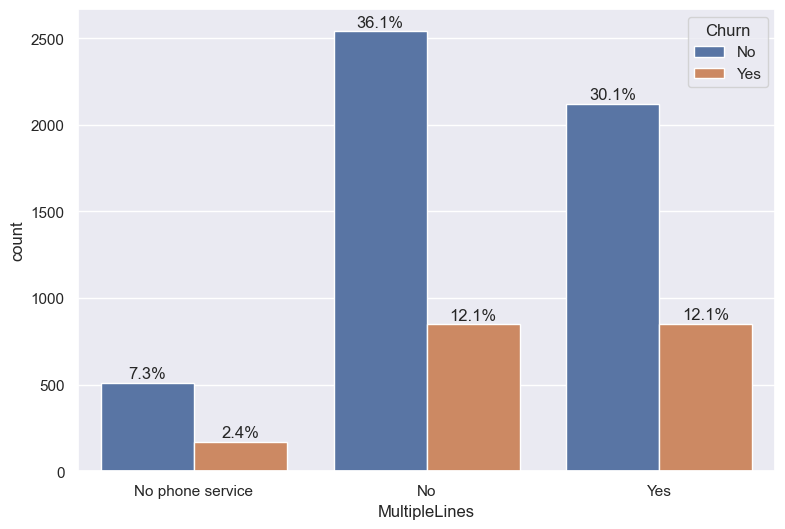

In [28]:
#Churned vs non-churned depending on having or not having multiple lines
bar_plot('MultipleLines')
plt.savefig("MultipleLines_churn.png",dpi=300,bbox_inches='tight')

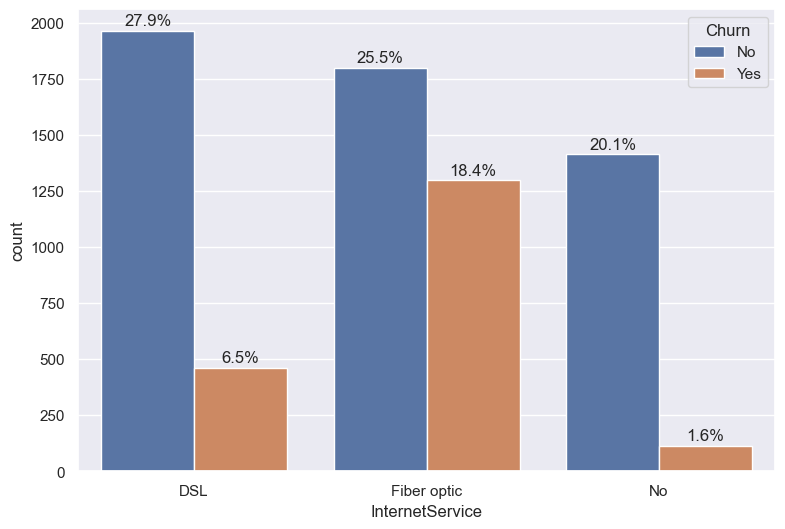

In [29]:
#Churned vs non-churned depending on having or not having internet service
bar_plot('InternetService')
plt.savefig("InternetService_churn.png",dpi=300,bbox_inches='tight')

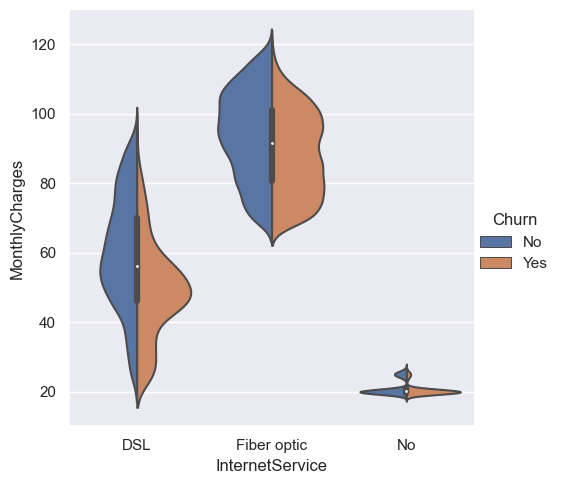

In [30]:
#Distribution of churned vs non-churned depending on monthly charges and internet service
sns.catplot(x='InternetService', y='MonthlyCharges', hue='Churn', kind='violin',split=True,data=df_clean)
plt.savefig("MonthlyCharges_InternetService_churn.png",dpi=300,bbox_inches='tight')

#### Additional services

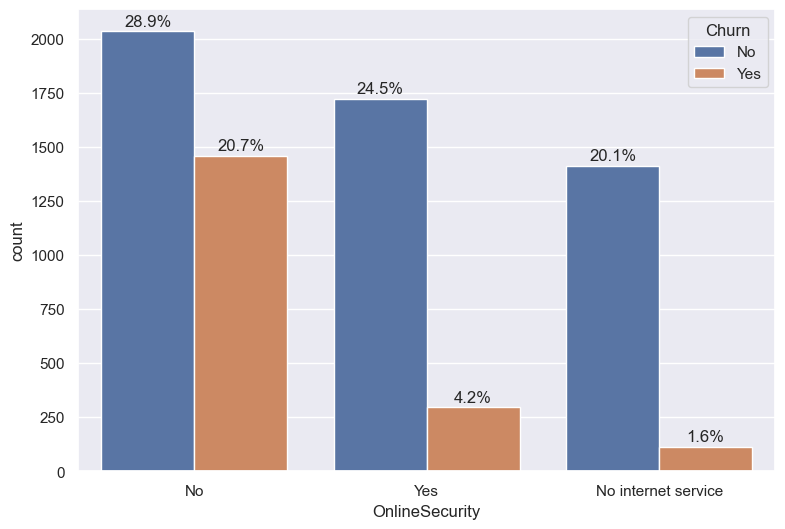

In [31]:
# Churned vs non-churned depending on having or not having online security
bar_plot('OnlineSecurity')
plt.savefig("OnlineSecurity_churn.png",dpi=300,bbox_inches='tight')

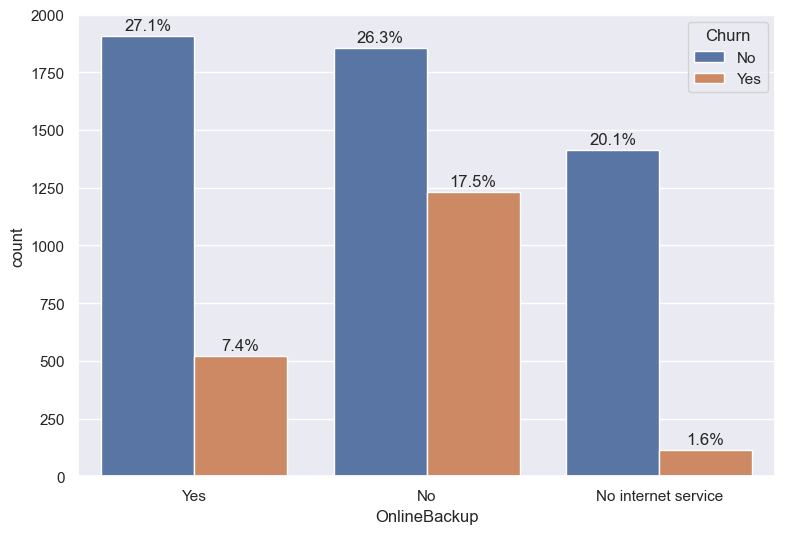

In [32]:
# Churned vs non-churned depending on having or not having online backup
bar_plot('OnlineBackup')
plt.savefig("OnlineBackup_churn.png",dpi=300,bbox_inches='tight')

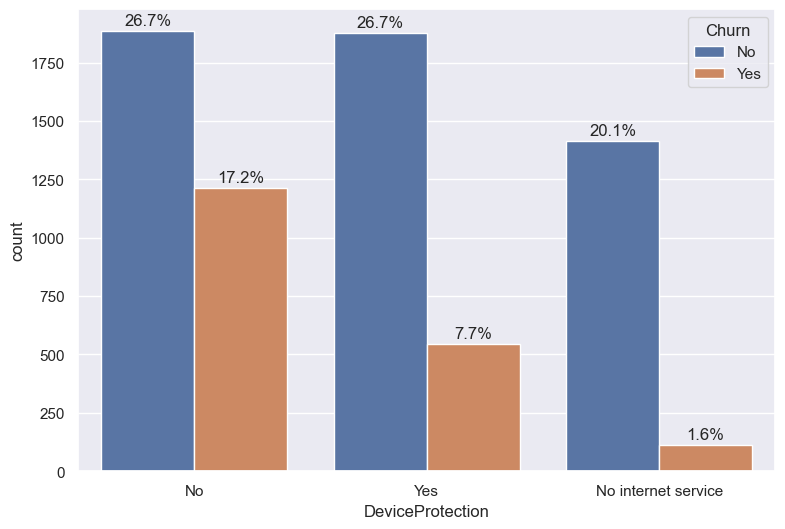

In [33]:
# Churned vs non-churned depending on having or not having device protection
bar_plot('DeviceProtection')
plt.savefig("DeviceProtection_churn.png",dpi=300,bbox_inches='tight')

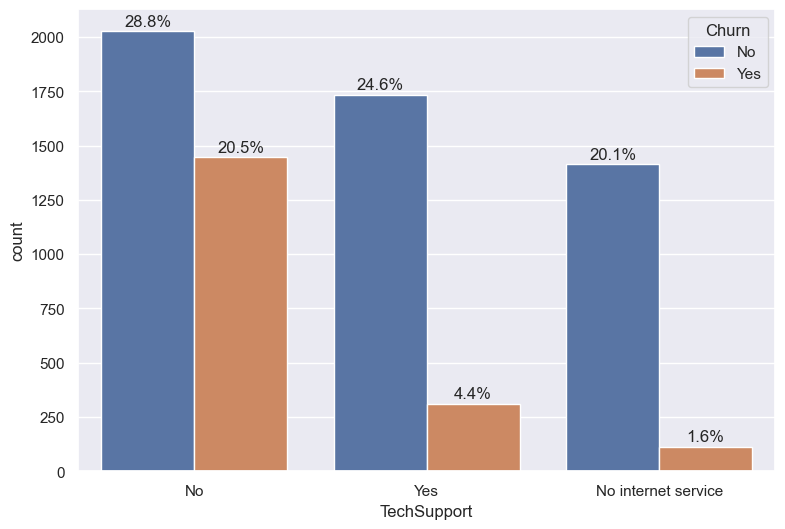

In [34]:
# Churned vs non-churned depending on having or not having tech support
bar_plot('TechSupport')
plt.savefig("TechSupport_churn.png",dpi=300,bbox_inches='tight')

In [35]:
#Select from the data churned customers with no additional services only.
df_no_additional_services_churn = df_clean[(df_clean['Churn']=='Yes')&(df_clean['OnlineSecurity']=='No')&
                                           (df_clean['OnlineBackup']=='No')&
                                          (df_clean['DeviceProtection']=='No')&
                                          (df_clean['TechSupport']=='No')]

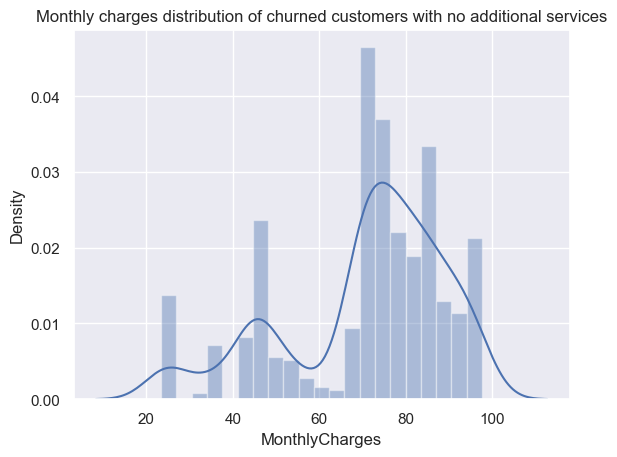

In [36]:
# Monthly charges distribution of churned customers with no additional services
sns.distplot(df_no_additional_services_churn['MonthlyCharges'])
plt.title('Monthly charges distribution of churned customers with no additional services')
plt.savefig("MonthlyCharges_no_additional_services_distrib.png",dpi=300,bbox_inches='tight')

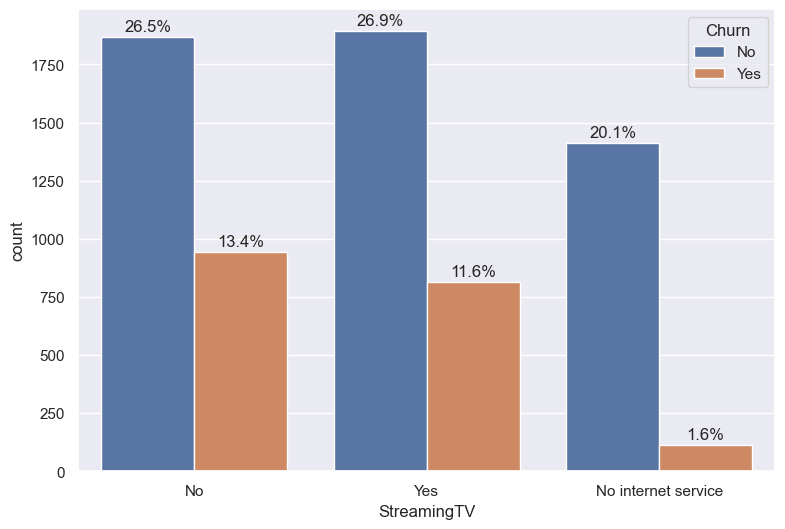

In [37]:
# Churned vs non-churned depending on having or not having streaming TV
bar_plot('StreamingTV')
plt.savefig("StreamingTV_churn.png",dpi=300,bbox_inches='tight')

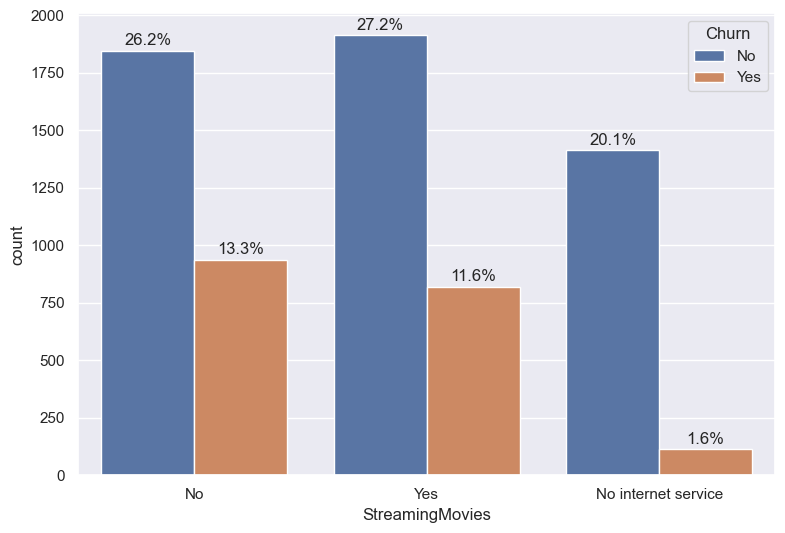

In [38]:
# Churned vs non-churned depending on having or not having streaming movies
bar_plot('StreamingMovies')
plt.savefig("StreamingMovies_churn.png",dpi=300,bbox_inches='tight')

#### Type of contract

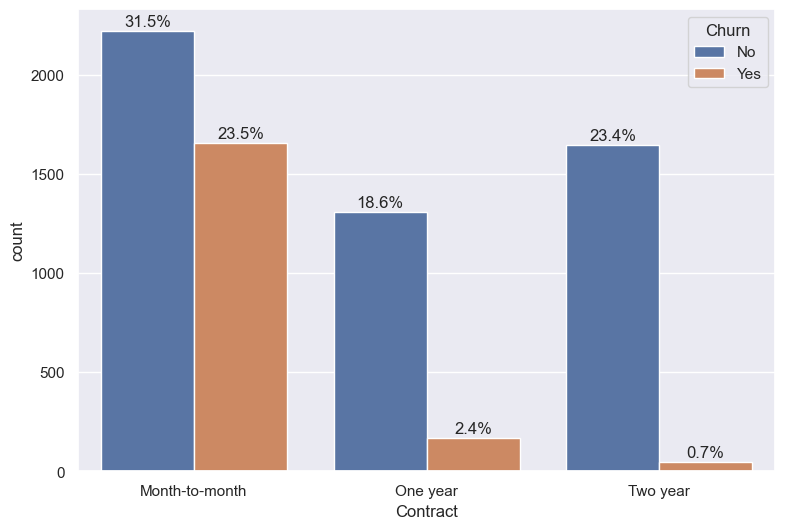

In [39]:
# Churned vs non-churned depending on type of contract
bar_plot('Contract')
plt.savefig("Contract_churn.png",dpi=300,bbox_inches='tight')

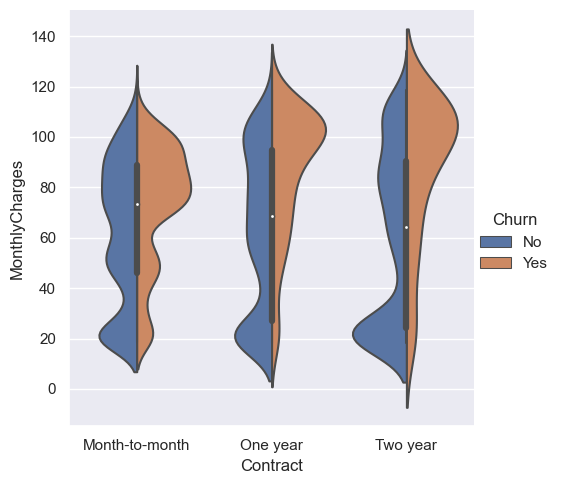

In [40]:
#Distribution of churned vs non-churned depending on monthly charges and type of contract
sns.catplot(x='Contract', y='MonthlyCharges', hue='Churn', kind='violin',data=df_clean,split=True)
plt.savefig("MonthlyCharges_Contract_churn.png",dpi=300,bbox_inches='tight')

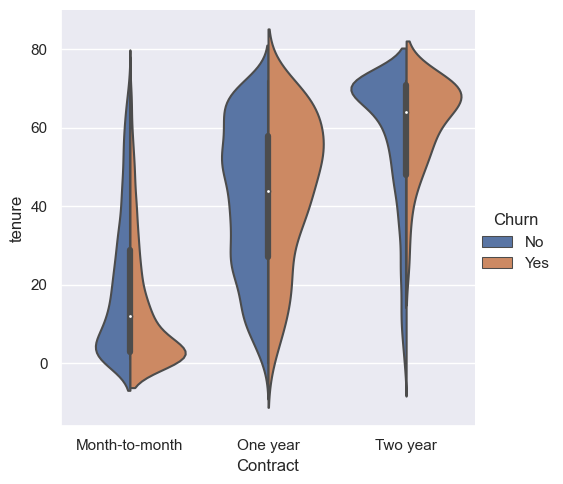

In [41]:
#Distribution of churned vs non-churned depending on tenure and type of contract
sns.catplot(x='Contract', y='tenure', hue='Churn', kind='violin',data=df_clean,split=True)
plt.savefig("Tenure_Contract_churn.png",dpi=300,bbox_inches='tight')

#### Billing and Payment method

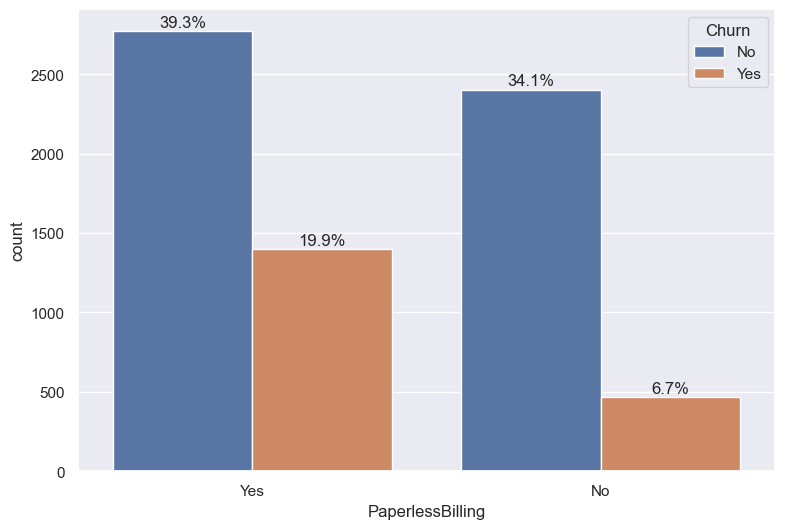

In [42]:
# Churned vs non-churned depending on having or not having paperless billing
bar_plot('PaperlessBilling')
plt.savefig("PaperlessBilling_churn.png",dpi=300,bbox_inches='tight')

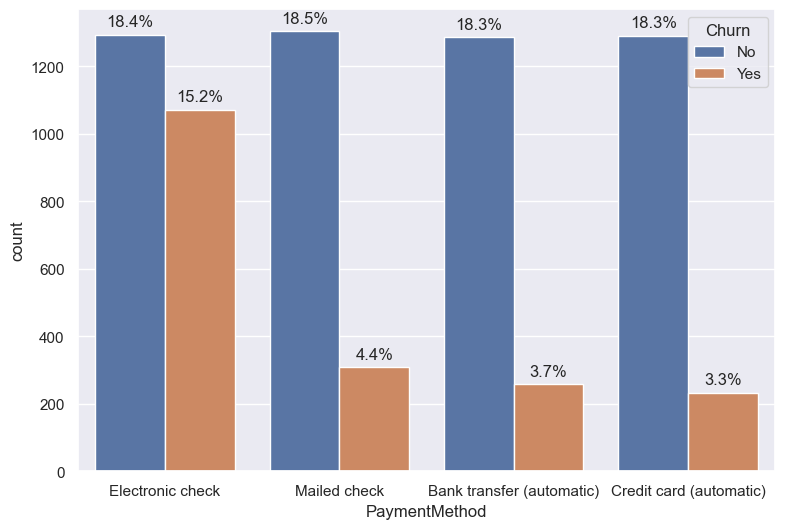

In [43]:
# Churned vs non-churned depending on type of payment method
bar_plot('PaymentMethod')
plt.savefig("PaymentMethod_churn.png",dpi=300,bbox_inches='tight')

Since monthly charges have influence on the probabilty of customers churn let's take a closer look at relation between this variable and some others.

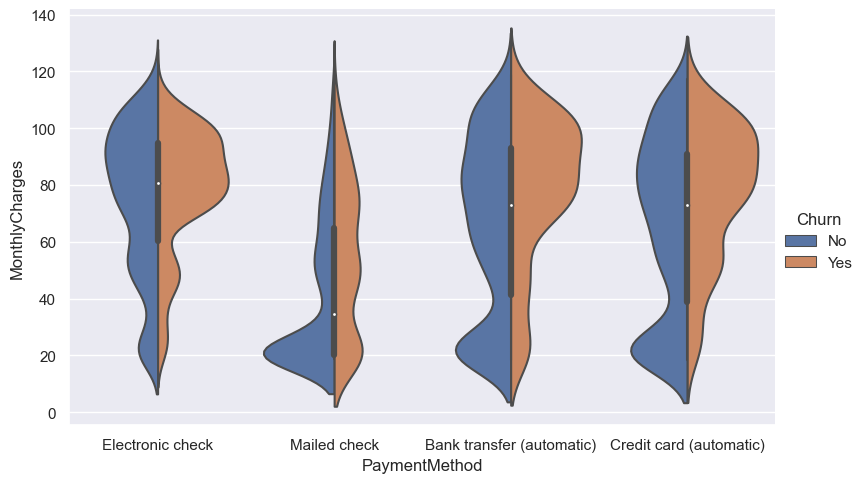

In [44]:
#Distribution of churned vs non-churned depending on monthly charges and payment method
sns.catplot(x='PaymentMethod', y='MonthlyCharges', hue='Churn', kind='violin',split=True,data=df_clean, aspect=1.6)
plt.savefig("MonthlyCharges_PaymentMethod_churn.png",dpi=300,bbox_inches='tight')

#### Senior citizens

Even though Senior citizens is relatevely small group of customers almost half of them are churned ones. Let's investigate this group of customers to figure out if there is something specific about it.

In [45]:
#Select from the data senior churned customers only.
df_senior_churn = df_clean[(df_clean['SeniorCitizen']==1)]

In [46]:
#Building a bar plot for senior churned customers depending on category
def senior_churned_plot(category):
    f,ax = plt.subplots(figsize=(9,6))
    sns.set(style="darkgrid")
    ax = sns.countplot(x=category,hue='Churn',data=df_senior_churn,palette='RdBu')
    total= len(df_senior_churn[category])
    for p in ax.patches:
        height =  p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height+2,'{:.1f}%'.format(100*height/total),ha='center')

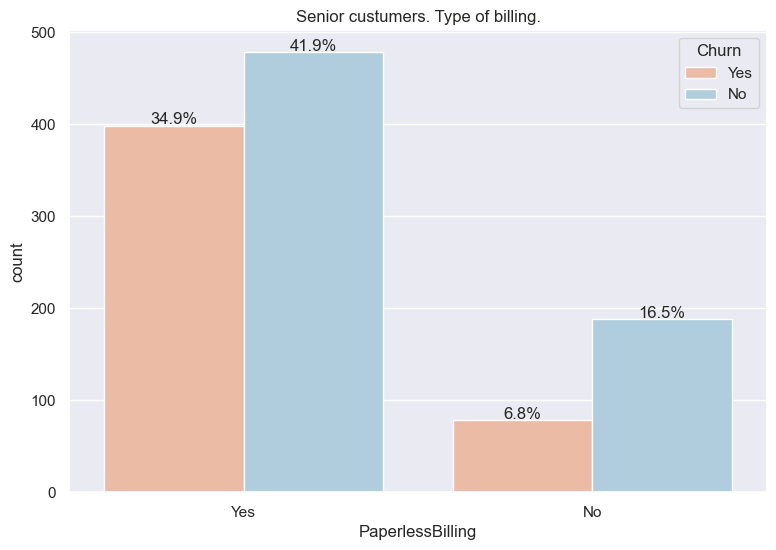

In [47]:
#Distribution of senior churned customers depending on if they have or don't have paperless billing
senior_churned_plot('PaperlessBilling')
plt.title('Senior custumers. Type of billing.')
plt.savefig("Senior_PaperlessBilling.png",dpi=300,bbox_inches='tight')

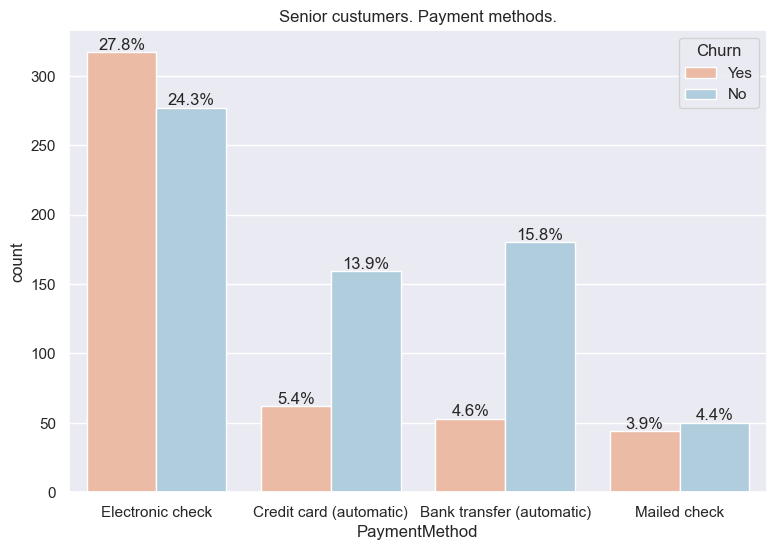

In [48]:
#Distribution of senior churned customers depending on payment method
senior_churned_plot('PaymentMethod')
plt.title('Senior custumers. Payment methods.')
plt.savefig("Senior_PaymentMethod.png",dpi=300,bbox_inches='tight')

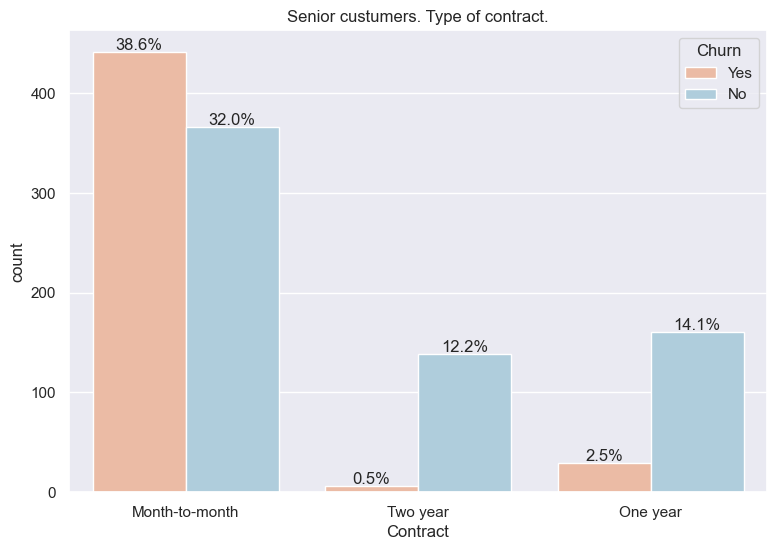

In [49]:
#Distribution of senior churned customers depending on type of contract
senior_churned_plot('Contract')
plt.title('Senior custumers. Type of contract.')
plt.savefig("Senior_Contract.png",dpi=300,bbox_inches='tight')

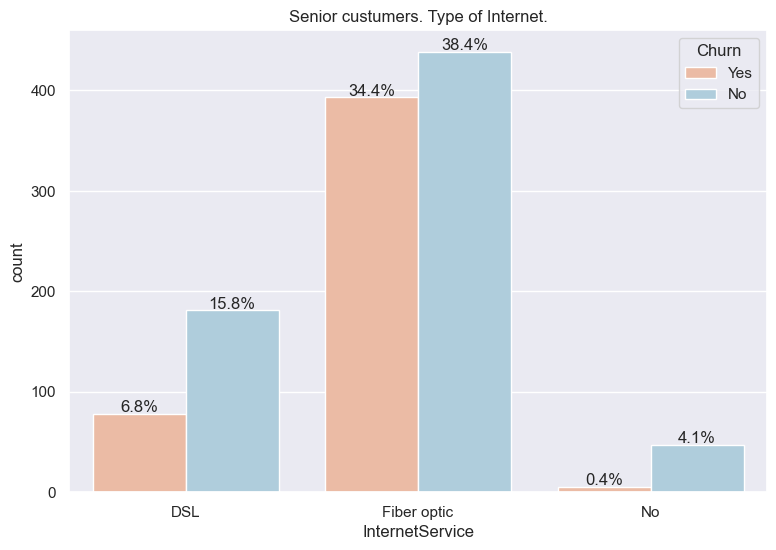

In [50]:
#Distribution of senior churned customers depending on internet service
senior_churned_plot('InternetService')
plt.title('Senior custumers. Type of Internet.')
plt.savefig("Senior_InternetService.png",dpi=300,bbox_inches='tight')

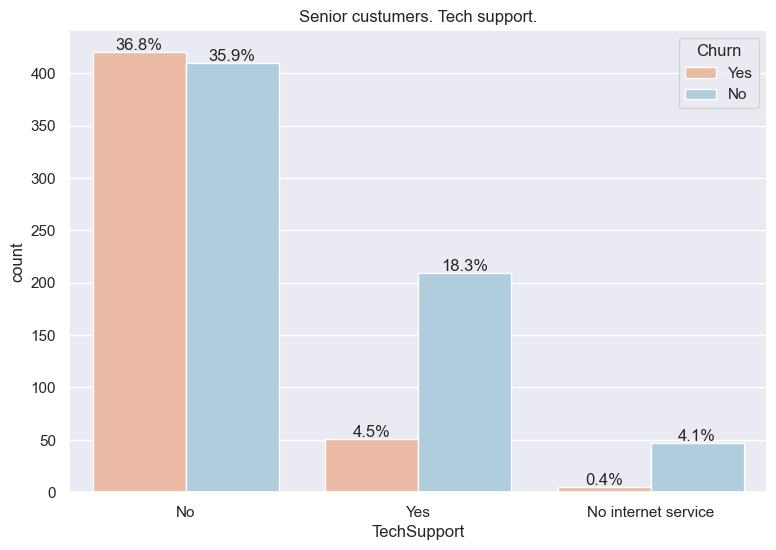

In [51]:
#Distribution of senior churned customers depending on tech support
senior_churned_plot('TechSupport')
plt.title('Senior custumers. Tech support.')
plt.savefig("Senior_TechSupport.png",dpi=300,bbox_inches='tight')

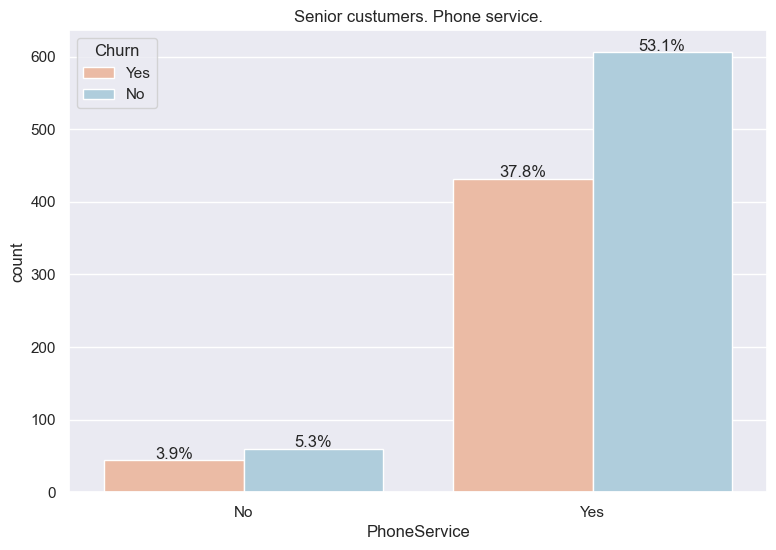

In [52]:
#Distribution of senior churned customers depending on phone service
senior_churned_plot('PhoneService')
plt.title('Senior custumers. Phone service.')
plt.savefig("Senior_PhoneService.png",dpi=300,bbox_inches='tight')

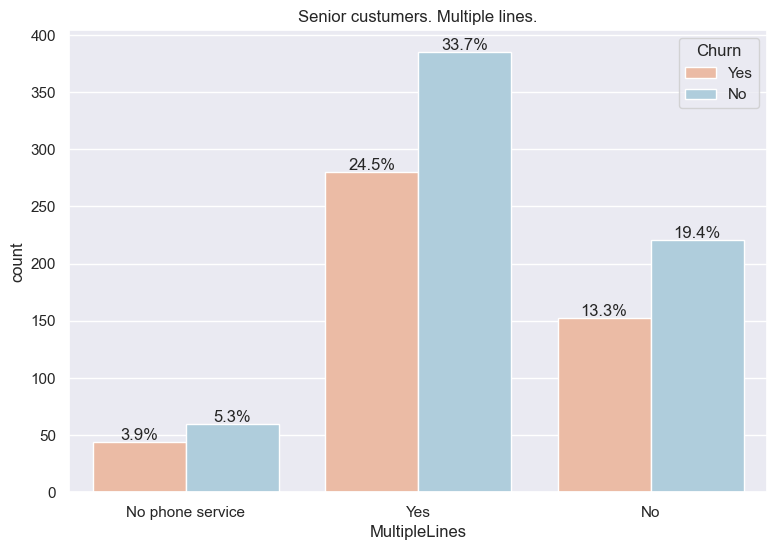

In [53]:
#Distribution of senior churned customers depending on multiple lines
senior_churned_plot('MultipleLines')
plt.title('Senior custumers. Multiple lines.')
plt.savefig("Senior_MultipleLines.png",dpi=300,bbox_inches='tight')

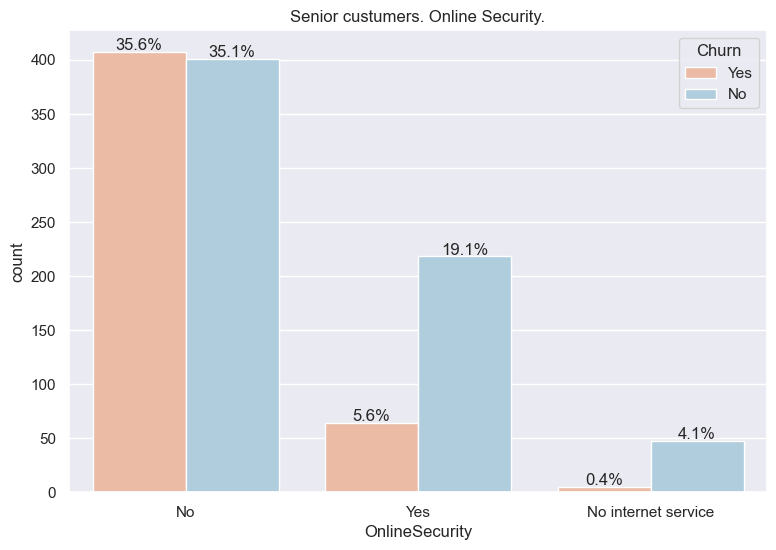

In [54]:
#Distribution of senior churned customers depending on online security
senior_churned_plot('OnlineSecurity')
plt.title('Senior custumers. Online Security.')
plt.savefig("Senior_OnlineSecurity.png",dpi=300,bbox_inches='tight')

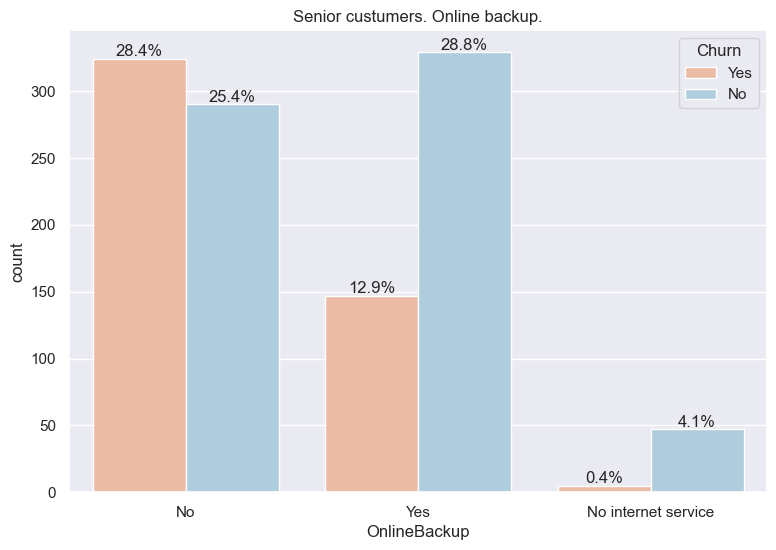

In [55]:
#Distribution of senior churned customers depending on online backup
senior_churned_plot('OnlineBackup')
plt.title('Senior custumers. Online backup.')
plt.savefig("Senior_OnlineBackup.png",dpi=300,bbox_inches='tight')

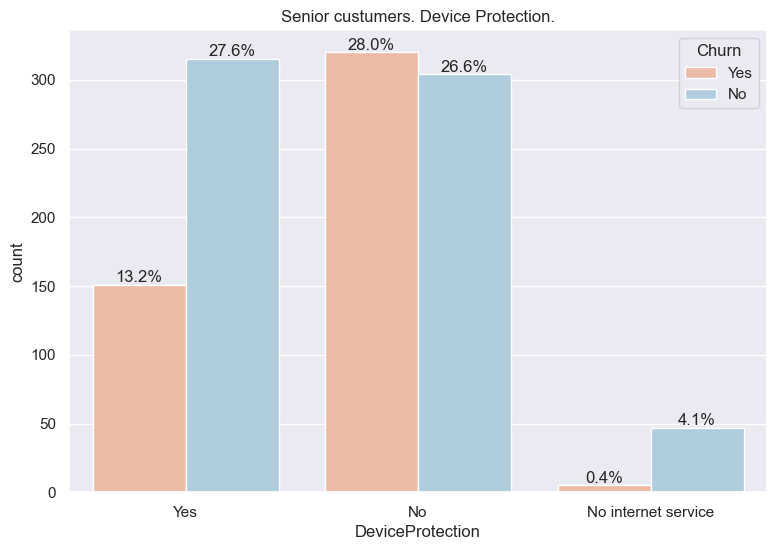

In [56]:
#Distribution of senior churned customers depending on device protection
senior_churned_plot('DeviceProtection')
plt.title('Senior custumers. Device Protection.')
plt.savefig("Senior_DeviceProtection.png",dpi=300,bbox_inches='tight')

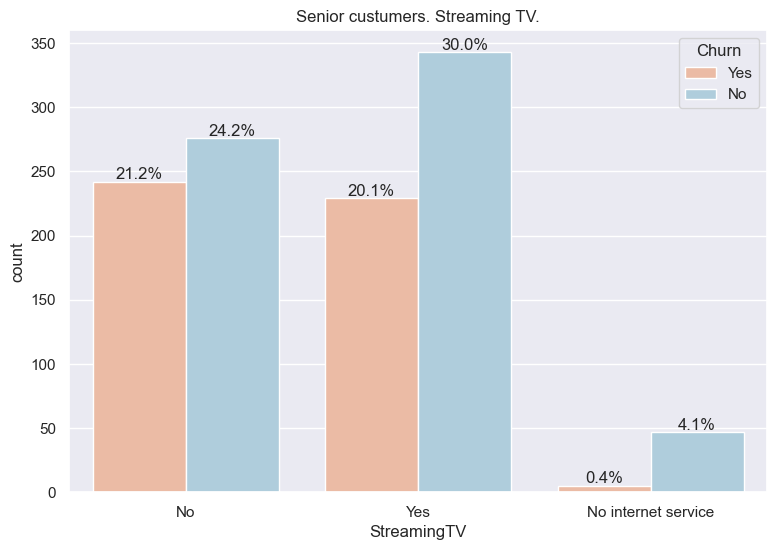

In [57]:
#Distribution of senior churned customers depending on streaming TV
senior_churned_plot('StreamingTV')
plt.title('Senior custumers. Streaming TV.')
plt.savefig("Senior_StreamingTV.png",dpi=300,bbox_inches='tight')

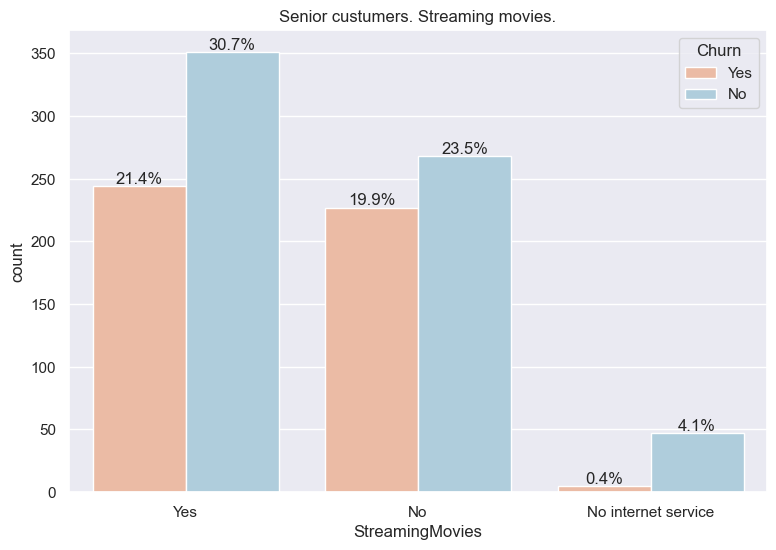

In [58]:
#Distribution of senior churned customers depending on streaming movies
senior_churned_plot('StreamingMovies')
plt.title('Senior custumers. Streaming movies.')
plt.savefig("Senior_StreamingMovies.png",dpi=300,bbox_inches='tight')

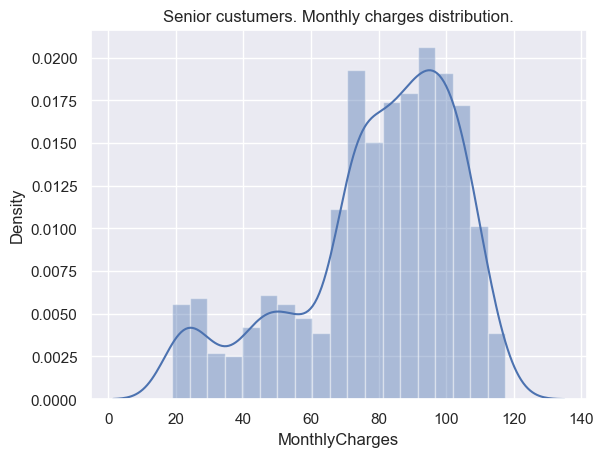

In [59]:
#Distribution of senior churned customers depending on monthly charges
sns.distplot(df_senior_churn['MonthlyCharges'])
plt.title('Senior custumers. Monthly charges distribution.')
plt.savefig("Senior_MonthlyCharges.png",dpi=300,bbox_inches='tight')

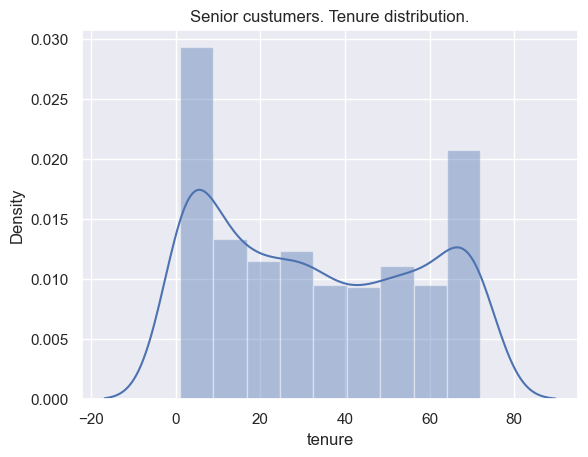

In [60]:
#Distribution of senior churned customers depending on tenure
sns.distplot(df_senior_churn['tenure'])
plt.title('Senior custumers. Tenure distribution.')
plt.savefig("Senior_tenure.png",dpi=300,bbox_inches='tight')

## Part 3 - DEVELOP

### ---- 5 Preparing data for ML ----

In [61]:
# Remove customer ID column since it is a unique number and cannot be helpful as a predictor
df_clean.drop(['customerID'],axis=1, inplace=True)

In [62]:
#Convert the predictor variable in a binary numeric variable
df_clean['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_clean['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [63]:
#Convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df_clean)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


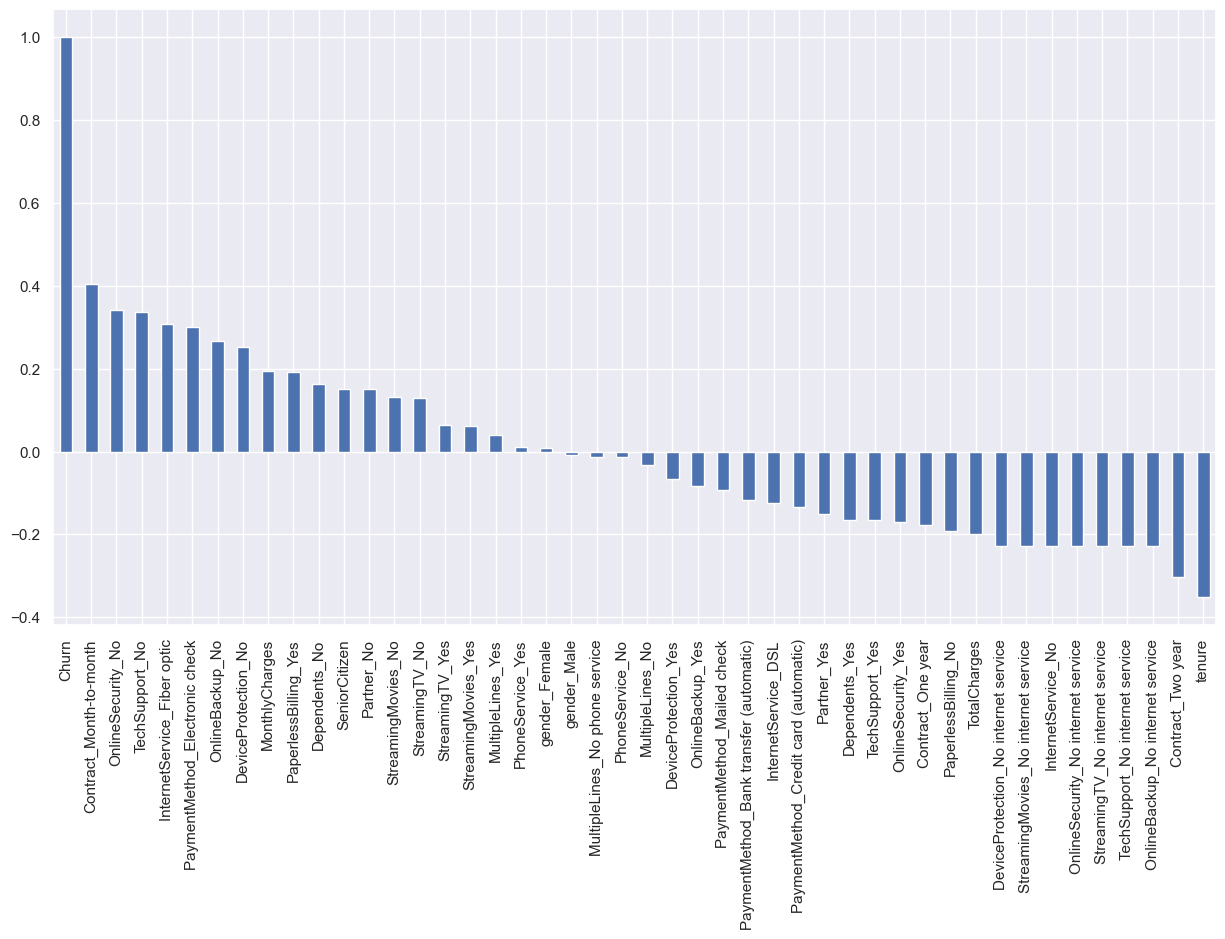

In [64]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.savefig("Correlation_churn.png",dpi=300,bbox_inches='tight')

Numerical variables in the data frame have different scales so for better performing of ML algorithms it is important 
to apply scalers to numerical variables. Since Standardization is probably a bit better in this case because it is less
affected by outliers.

In [65]:
#Retrieve numerical variables from data frame, create a new separate data frame and get some statistic about it
num_var = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = df_dummies[num_var]
df_num.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
# Apply standardization to numerical variables
df_num_std = pd.DataFrame(StandardScaler().fit_transform(df_num.astype('float64')),columns=num_var)
df_num_std.describe()

,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.421273e-17,-6.406285e-17,-3.783239e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-1.005780e+00
25%,-9.516817e-01,-9.725399e-01,-8.299464e-01
50%,-1.372744e-01,1.857327e-01,-3.905282e-01
75%,9.214551e-01,8.338335e-01,6.648034e-01
max,1.613701e+00,1.794352e+00,2.825806e+00


In [68]:
#Create a new dataframe with transformed variables ready for ML
df_cat = df_dummies.copy()
df_cat.drop(num_var,axis=1,inplace=True)
df_processed = pd.concat([df_cat,df_num_std],axis=1)

In [69]:
#get features and a target for modeling
features = df_processed.drop(columns = ['Churn'])
target = df_processed['Churn'].values

In [70]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### ---- 6 Metrics ----

Since the dataset is imbalanced Accuracy cannot be a reliable metric to assess performance of the model. Having a model that predicts all '0' which means no churn customers automatically gets 73.5% accuracy but it is no use at all. Thus for a better assessing model performance the area under ROC curve is going to be used as a main metric. Also dealing with imbalanced data set applying different resample methods may improve model performance.

### ---- 7 Resample methods ----

Three resample methods are going to be applied to the data:

1. Upsample. Randomly resampled the minority class creates new data.
2. SMOTE. Creates new synthetic data by using nearest neighbors of the minority class.
3. Downsample. Randomly removes observations of majority class.

In [71]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [72]:
# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],y_train[y_train == 1],replace=True,
                                n_samples=X_train[y_train == 0].shape[0],random_state=42)
X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))

In [74]:
# Upsample using SMOTE
sm = SMOTE(random_state = 42)
x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [75]:
# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],y_train[y_train == 0],replace=True,
                                n_samples=X_train[y_train == 1].shape[0],random_state=42)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

In [76]:
#Look at the training set shape of each resample method
print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (5634, 45) (5634,)
Upsampled shape: (8276, 45) (8276,)
SMOTE sample shape: (8276, 45) (8276,)
Downsampled shape: (2992, 45) (2992,)


In order to choose resampling technique train Logistic Regression to each of them and apply 5-Fold cross validation to assess model performance.

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [78]:
# Create a dictionary contains all of resampled training sets including the original one
resample_methods = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "SMOTE":(x_train_sm, y_train_sm),
                "Downsampled": (X_train_d, y_train_d)}

In [79]:
# Loop through each type of training sets and print results
for method in resample_methods.keys():
        lr_results = cross_val_score(LogisticRegression(), resample_methods[method][0], 
                                     resample_methods[method][1], cv=5, scoring='roc_auc')
        print(f"The best ROC_AUC Score for {method} training set:")
        print (lr_results.mean())

cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='roc_auc').mean()

The best ROC_AUC Score for Original training set:
0.8407467582574295
The best ROC_AUC Score for Upsampled training set:
0.8423111716044671
The best ROC_AUC Score for SMOTE training set:
0.9283581206104291
The best ROC_AUC Score for Downsampled training set:
0.8477800472030514


0.8405837302474131

SMOTE resample technique provided the best result during 5-Fold cross-validation. So this technique is going to be used to train models.

### ---- 8 Create models ----

In [80]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,average_precision_score

In [81]:
# Crete a function to get a full report of a model performance
def model_report(model):
    print('Cross-validation ROC AUC score:{0:0.4f}'.
          format(cross_val_score(model,x_train_sm,y_train_sm,cv=5,scoring='roc_auc').mean()))
    print('\n')
    model.fit(x_train_sm,y_train_sm)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))
    print('\n')
    print('Accuracy: %.2f%%'% (accuracy_score(y_test,y_pred)*100))
    print('\n')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    print('Average precision-recall score: {0:0.2f}'.format(average_precision_score(y_test,y_prob[:,1])))
    print('ROC_AUC score: {0:0.4f}'.format(roc_auc_score(y_test,y_prob[:,1])))

#### Logistic Regression

In [82]:
# Logistic Regression model
lr = LogisticRegression(random_state=42)

In [83]:
# Get a report for Logistic Regression performance
model_report(lr)

Cross-validation ROC AUC score:0.9284


Confusion matrix: 
 [[870 166]
 [115 258]]


Accuracy: 80.06%


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.61      0.69      0.65       373

    accuracy                           0.80      1409
   macro avg       0.75      0.77      0.75      1409
weighted avg       0.81      0.80      0.80      1409

Average precision-recall score: 0.68
ROC_AUC score: 0.8600


#### Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier(random_state=42)

In [85]:
# Get a report for Random Forest performance
model_report(rf)

Cross-validation ROC AUC score:0.9285


Confusion matrix: 
 [[879 157]
 [152 221]]


Accuracy: 78.07%


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

Average precision-recall score: 0.62
ROC_AUC score: 0.8319


In [86]:
#get feature importances,save them to a dataframe and sort them in a descending order
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature':features.columns,'importance':importances})
feature_importances.sort_values(by='importance',ascending=False,inplace=True)

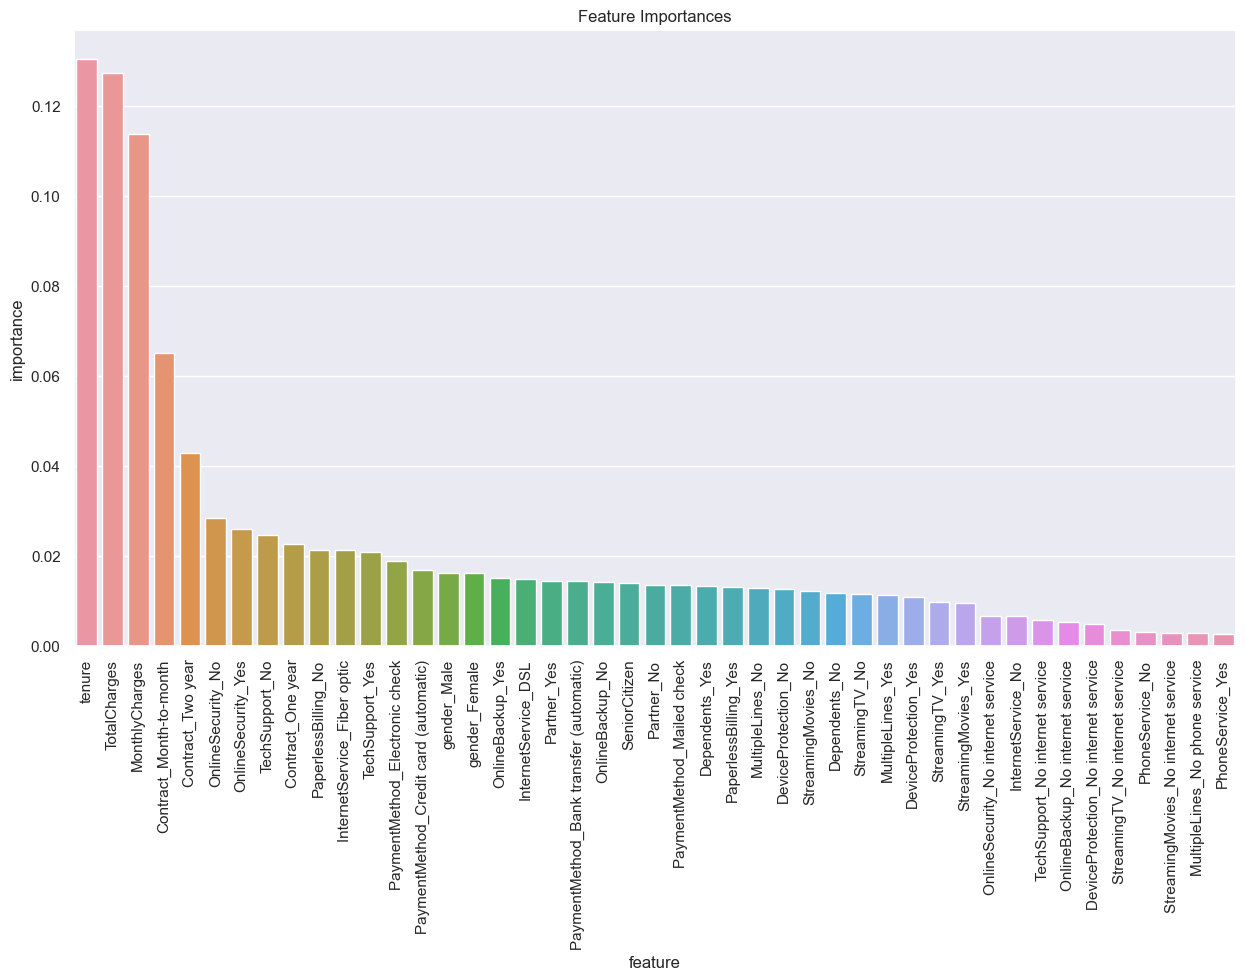

In [87]:
#build a plot visualzing feature importances
f, ax = plt.subplots(figsize=(15,8))
Feature_Importances = sns.barplot(x='feature',y='importance',data=feature_importances)
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.savefig("Feature_Importances.png",dpi=300,bbox_inches='tight')

#### Stochastic Gradient Descent (SGD)

In [88]:
from sklearn.linear_model import SGDClassifier

# Stochastic Gradient Descent Model
sgd = SGDClassifier(loss='log',random_state=42)

In [89]:
# Get a report for Stochastic Gradient Descent performance
model_report(sgd)

Cross-validation ROC AUC score:0.9246


Confusion matrix: 
 [[863 173]
 [111 262]]


Accuracy: 79.84%


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1036
           1       0.60      0.70      0.65       373

    accuracy                           0.80      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.80      0.80      1409

Average precision-recall score: 0.68
ROC_AUC score: 0.8600


#### Gradient Boosting Classifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier Model
gbc = GradientBoostingClassifier(random_state=42)

In [91]:
model_report(gbc)

Cross-validation ROC AUC score:0.9083


Confusion matrix: 
 [[817 219]
 [ 93 280]]


Accuracy: 77.86%


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      1036
           1       0.56      0.75      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409

Average precision-recall score: 0.68
ROC_AUC score: 0.8568


#### AdaBoost Classifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# AdaBoost Classifier Model
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100,random_state=42)

In [93]:
model_report(abc)

Cross-validation ROC AUC score:0.9008


Confusion matrix: 
 [[815 221]
 [ 92 281]]


Accuracy: 77.79%


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      1036
           1       0.56      0.75      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409

Average precision-recall score: 0.69
ROC_AUC score: 0.8581


### ---- 9 Hyperparameters tuning ----

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
#set hyperparameters for the grid search 
param_grid = {'C': np.linspace(0.02,3,100),'penalty': ['l2','l1','none','elasticnet']}

In [96]:
#grid search for best hyperparameters
clf = GridSearchCV(lr,param_grid,cv=5,n_jobs=-1, scoring='roc_auc')
lr_best = clf.fit(x_train_sm,y_train_sm)

In [97]:
# print best hyperparameters and score
print('Best C:',lr_best.best_estimator_.get_params()['C'])
print('Best penalty:',lr_best.best_estimator_.get_params()['penalty'])
print('Best score:',lr_best.best_score_)

Best C: 3.0
Best penalty: l2
Best score: 0.9297168481862421


In [98]:
# get report of the tuned logistic regression model performance
model_report(lr_best)

Cross-validation ROC AUC score:0.9291


Confusion matrix: 
 [[870 166]
 [114 259]]


Accuracy: 80.13%


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.61      0.69      0.65       373

    accuracy                           0.80      1409
   macro avg       0.75      0.77      0.76      1409
weighted avg       0.81      0.80      0.81      1409

Average precision-recall score: 0.67
ROC_AUC score: 0.8590


Even though tuned model performed slightly better on the training set there is no improvement on the test set so the default hyperparameters are going to be used.

### ---- 10 Ensemble model ----

Combining different models can improve results. So we are going to pick two best models which are Logistic Regression and Stochastic Gradient Descent and use ensemble method to combine them together.

In [100]:
from sklearn.ensemble import VotingClassifier

In [101]:
#Create a list of the models with the best scores to ensemble
estimators = []
estimators.append(('logistic', lr))
estimators.append(('stochastic_gradient', sgd))

In [102]:
# create the ensemble model
ensemble = VotingClassifier(estimators, voting='soft')

In [103]:
model_report(ensemble)

Cross-validation ROC AUC score:0.9278


Confusion matrix: 
 [[865 171]
 [113 260]]


Accuracy: 79.84%


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      1036
           1       0.60      0.70      0.65       373

    accuracy                           0.80      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.80      0.80      1409

Average precision-recall score: 0.68
ROC_AUC score: 0.8604


There is a very slight improvement of a chosen metric (ROC_AUC score) so this ensembled model is going to be used for production.

### ---- 11 ROC and Precision Recall Graph ----

Build graphs for main metrics ROC_AUC and Precision-Recall to visualize models performance.

In [104]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [105]:
# Create roc_curve for each mofel
lr_fpr,lr_tpr,lr_thresholds = roc_curve(y_test,lr.predict_proba(X_test)[:,1])
sgd_fpr,sgd_tpr,sgd_thresholds = roc_curve(y_test,sgd.predict_proba(X_test)[:,1])
ensemble_fpr,ensemble_tpr,ensemble_thresholds = roc_curve(y_test,ensemble.predict_proba(X_test)[:,1])

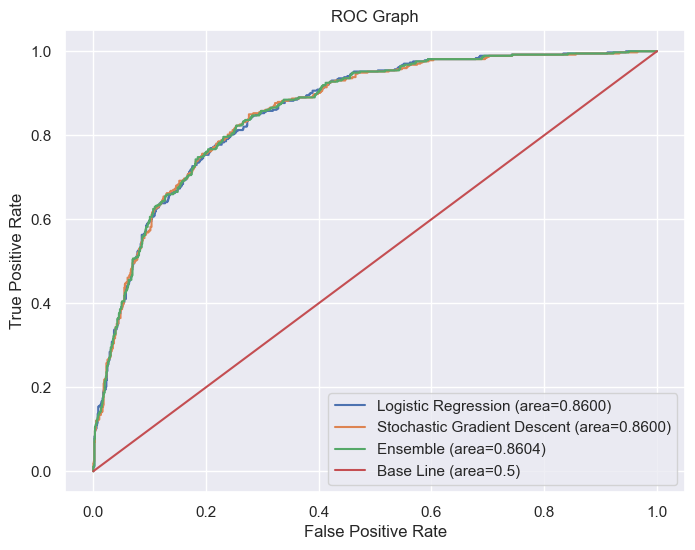

In [106]:
# Build ROC graph
fig =plt.figure(figsize=(8,6))

plt.plot(lr_fpr,lr_tpr, label='Logistic Regression (area=%0.4f)'% 
         roc_auc_score(y_test,lr.predict_proba(X_test)[:,1]))

plt.plot(sgd_fpr,sgd_tpr, label='Stochastic Gradient Descent (area=%0.4f)'% 
         roc_auc_score(y_test,sgd.predict_proba(X_test)[:,1]))

plt.plot(ensemble_fpr,ensemble_tpr, label='Ensemble (area=%0.4f)'% 
         roc_auc_score(y_test,ensemble.predict_proba(X_test)[:,1]))

plt.plot([0,1],[0,1], label ='Base Line (area=0.5)')

plt.legend(loc='lower right')
plt.title('ROC Graph')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.savefig("ROC Graph.png",dpi=300,bbox_inches='tight')

In [107]:
# Create precision-recall curve for each model
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(lr.predict(X_test),y_test)
precision_sgd, recall_sgd, thresholds_sgd = precision_recall_curve(sgd.predict(X_test),y_test)
precision_ensemble, recall_ensemble, thresholds_ensemble = precision_recall_curve(ensemble.predict(X_test),y_test)

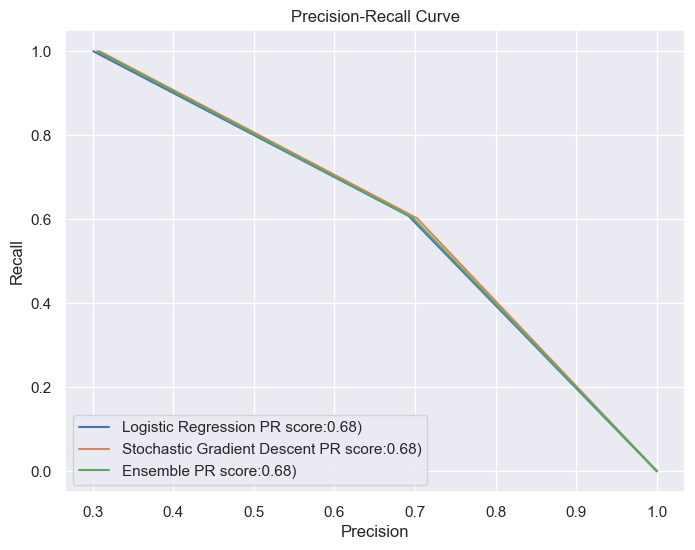

In [108]:
#Build Precidion-Recall graph
fig =plt.figure(figsize=(8,6))

plt.plot(precision_lr,recall_lr, 
         label='Logistic Regression PR score:%0.2f)'%average_precision_score(y_test,lr.predict_proba(X_test)[:,1]))

plt.plot(precision_sgd,recall_sgd, 
         label='Stochastic Gradient Descent PR score:%0.2f)'%average_precision_score(y_test,sgd.predict_proba(X_test)[:,1]))

plt.plot(precision_ensemble,recall_ensemble, 
         label='Ensemble PR score:%0.2f)'%average_precision_score(y_test,ensemble.predict_proba(X_test)[:,1]))

plt.title('Precision-Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='lower left')

plt.savefig("Precision-Recall Graph.png",dpi=300,bbox_inches='tight')

## Part 4 - DEPLOY

### ---- 12 Save model ----

In [110]:
#import pickle module to save a model
import pickle

In [111]:
#assign chosen algorithm and its hyperparameters for the model
model = ensemble

In [112]:
#give a name for the file to store the model
filename = 'Final_model.pkl'

In [114]:
#save the model to a file
with open(filename,'wb') as file:
    pickle.dump(model,file)

### <center>-----------------------------END------------------------------------